In [1]:
! pip install pymc

DEPRECATION: Loading egg at /home/jovyan/.local/lib/python3.11/site-packages/tf_unet-0.1.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached pymc-5.13.1-py3-none-any.whl.metadata (10 kB)
  Using cached arviz-0.18.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached pytensor-2.20.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.8 kB)
  Using cached dm_tree-0.1.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached xarray_einstats-0.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached etuples-0.3.9-py3-none-any.whl
  Using cached logical_unification-0.4.6-py3-none-any.whl
  Using cached miniKanren-1.0.3-py3-none-any.whl
  Using cached cons-0.4.6-py3-none-any.whl
Using cached pymc-5.13.1-py3-none-any.whl (479 kB)
Using cached arviz-0.18.0-py3-none-any.whl (1.7 M

In [2]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
#import arviz as az

In [21]:
icebergs = pd.read_csv('largest_annual_iceberg_quadrentA.csv')

In [22]:
#icebergs.loc[icebergs['Area'] > 8000, 'Area'] = 11000 # fix iceberg B15 value

In [23]:
area = icebergs.Area
year = icebergs.Year

In [24]:
area = area.where( area > 250).dropna()

In [25]:
area = (area.dropna())

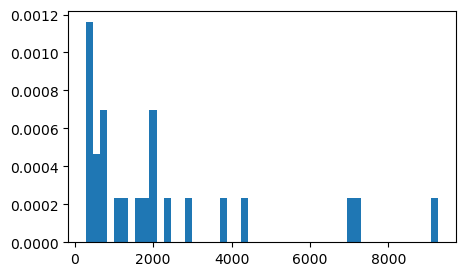

In [26]:
plt.figure(figsize=(5,3))
plt.hist(area, bins=50, density=True)
plt.show()

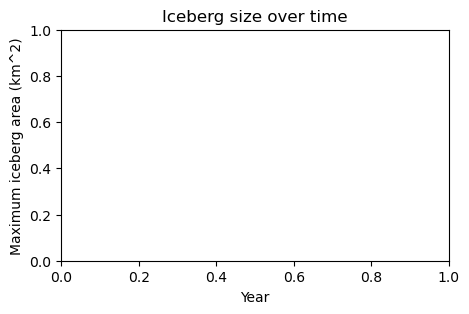

In [27]:
plt.figure(figsize=(5,3))
#plt.scatter(icebergs.Year, area, marker='.')
plt.xlabel('Year')
plt.ylabel('Maximum iceberg area (km^2)')
plt.title('Iceberg size over time')
plt.show()

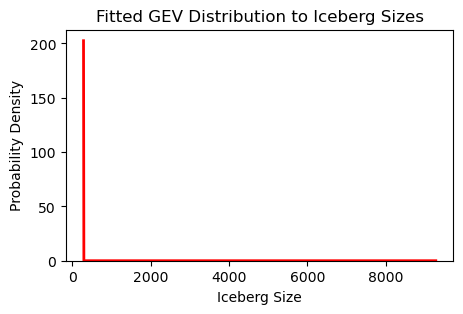

In [28]:
# Fit a GEV distribution to the data
params = stats.genextreme.fit(area)

# Generate some values from the fitted GEV distribution
x = np.linspace(min(area), max(area), 1000)
pdf_fitted = stats.genextreme.pdf(x, *params)

# Plot the histogram of the data and the fitted GEV distribution
plt.figure(figsize=(5,3))
plt.hist(area, bins=30, density=True)
plt.plot(x, pdf_fitted, 'r-', lw=2)
plt.xlabel('Iceberg Size')
plt.ylabel('Probability Density')
plt.title('Fitted GEV Distribution to Iceberg Sizes')
plt.show()

In [29]:
params # (c, loc, scale)
# c is the shape parameter, loc is the shift parameter (mu?), scale is the scale parameter (sigma?)

(-5.974344102531342, 288.5468658417471, 3.5278699142352923)

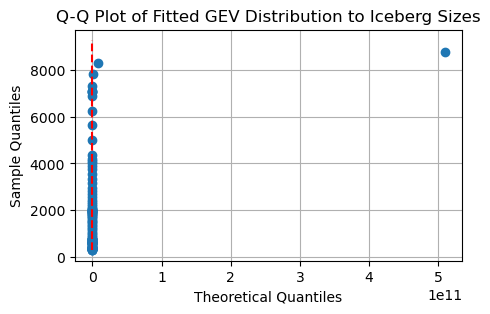

In [30]:
# Generate quantiles from the fitted GEV distribution
fitted_quantiles = stats.genextreme(*params).ppf(np.linspace(0.01, .99, 100))

# Generate quantiles from the sample data
data_quantiles = np.percentile(area, np.linspace(1, 99, 100))

# Plot the Q-Q plot
plt.figure(figsize=(5,3))
plt.plot(fitted_quantiles, data_quantiles, ls="", marker="o")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Fitted GEV Distribution to Iceberg Sizes')
plt.plot([np.min(area), np.max(area)], [np.min(area), np.max(area)], color='red', linestyle='--')
plt.grid(True)
plt.show()

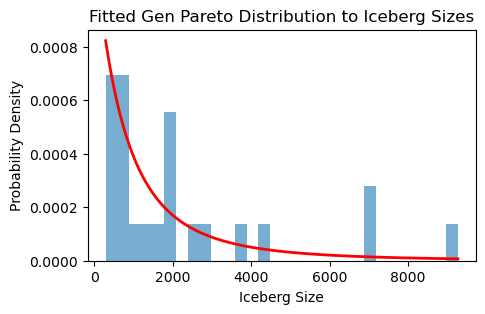

In [31]:
# Fit a Gumbel distribution to the data
c, loc, scale = stats.genpareto.fit(area)

# Generate some values from the fitted Gumbel distribution
x = np.linspace(min(area), max(area), 1000)
pdf_fitted = stats.genpareto.pdf(x, c=c, loc=loc, scale=scale)

# Plot the histogram of the data and the fitted Gumbel distribution
plt.figure(figsize=(5,3))
plt.hist(area, bins=30, density=True, alpha=0.6)
plt.plot(x, pdf_fitted, 'r-', lw=2)
plt.xlabel('Iceberg Size')
plt.ylabel('Probability Density')
plt.title('Fitted Gen Pareto Distribution to Iceberg Sizes')
plt.show()

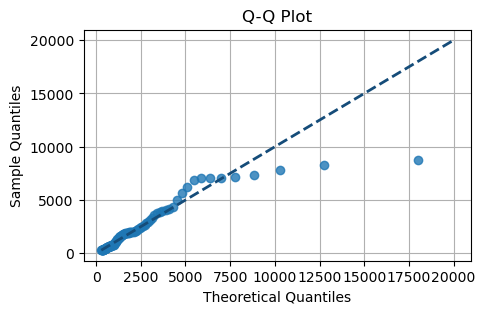

In [48]:
# Fit a Gumbel distribution to the data
c, loc, scale = stats.genpareto.fit(area)

# Generate quantiles from the fitted Gumbel distribution
fitted_quantiles = stats.genpareto.ppf(np.linspace(0.01, 0.99, 100), c=c, loc=loc, scale=scale)

# Generate quantiles from the sample data
data_quantiles = np.percentile(area, np.linspace(1, 99, 100))

# Plot the Q-Q plot
plt.figure(figsize=(5, 3))
plt.plot(fitted_quantiles, data_quantiles, ls="", marker="o",alpha=.8)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot')
plt.plot([np.min(area), 2e4], [np.min(area), 2e4], color='#154c79', linestyle='--',linewidth=2)
plt.grid(True)
plt.savefig('QQ_plot.jpg', dpi=300, bbox_inches = "tight")
plt.show()

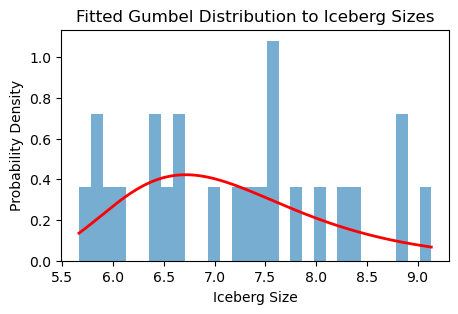

In [94]:
# Fit a Gumbel distribution to the data
loc, scale = stats.gumbel_r.fit(area)

# Generate some values from the fitted Gumbel distribution
x = np.linspace(min(area), max(area), 1000)
pdf_fitted = stats.gumbel_r.pdf(x, loc=loc, scale=scale)

# Plot the histogram of the data and the fitted Gumbel distribution
plt.figure(figsize=(5,3))
plt.hist(area, bins=30, density=True, alpha=0.6)
plt.plot(x, pdf_fitted, 'r-', lw=2)
plt.xlabel('Iceberg Size')
plt.ylabel('Probability Density')
plt.title('Fitted Gumbel Distribution to Iceberg Sizes')
plt.show()

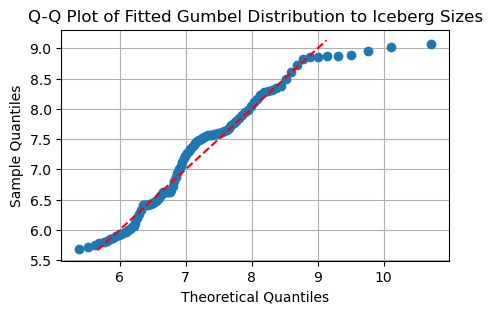

In [95]:
# Fit a Gumbel distribution to the data
loc, scale = stats.gumbel_r.fit(area)

# Generate quantiles from the fitted Gumbel distribution
fitted_quantiles = stats.gumbel_r.ppf(np.linspace(0.01, 0.99, 100), loc=loc, scale=scale)

# Generate quantiles from the sample data
data_quantiles = np.percentile(area, np.linspace(1, 99, 100))

# Plot the Q-Q plot
plt.figure(figsize=(5, 3))
plt.plot(fitted_quantiles, data_quantiles, ls="", marker="o")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Fitted Gumbel Distribution to Iceberg Sizes')
plt.plot([np.min(area), np.max(area)], [np.min(area), np.max(area)], color='red', linestyle='--')
plt.grid(True)
plt.show()

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import genextreme as gev
import os
import pooch
import tempfile

In [80]:
precipitation = area

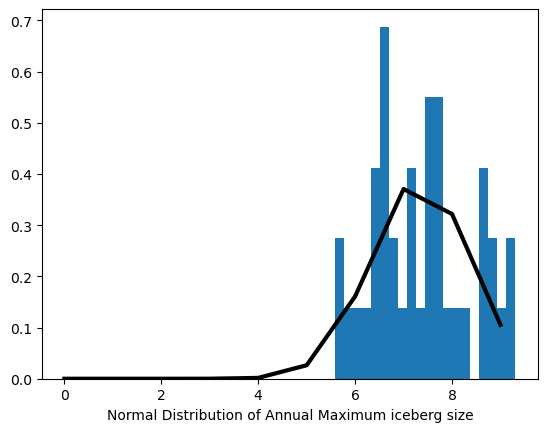

In [81]:
fig, ax = plt.subplots()
x_r100 = np.arange(0, precipitation.max(), 1)
bins = np.arange(0, precipitation.max(), 2)

ax.hist(precipitation, bins=20, density=True)

# plot PDF
ax.plot(
    x_r100,
    stats.norm.pdf(x_r100, precipitation.mean(), precipitation.std()),
    c="k",
    lw=3,
)

ylim = ax.get_ylim()
ax.set_xlabel("Normal Distribution of Annual Maximum iceberg size");

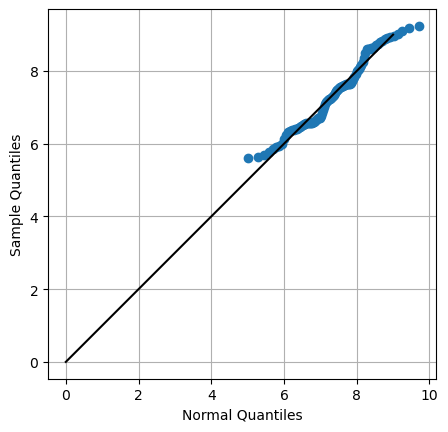

In [20]:
x_r1 = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

ax.plot(stats.norm.ppf(x_r1, precipitation.mean(),
                       precipitation.std()),
        # quantiles of a normal distribution with the mean and std of our precip data
        np.quantile(precipitation, x_r1),  # quantiles of our precip data
        "o",
        )
ax.plot(x_r100, x_r100, "k")

ax.set_xlabel("Normal Quantiles")
ax.set_ylabel("Sample Quantiles")

ax.grid(True)
ax.set_aspect("equal")

In [21]:
shape, loc, scale = gev.fit(precipitation.values,0)

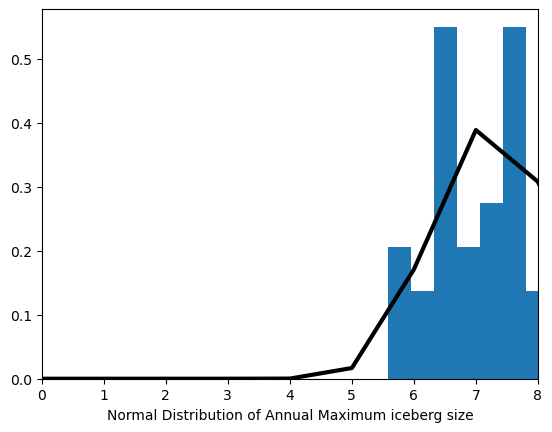

In [22]:
fig, ax = plt.subplots()
# make histogram
ax.hist(precipitation, density=True)
ax.set_xlim(bins[0], bins[-1])

# add GEV PDF
x_r80 = np.arange(precipitation.max())

ax.plot(x_r80, gev.pdf(x_r80, shape, loc=loc, scale=scale), "k", lw=3)
ax.set_xlabel("Normal Distribution of Annual Maximum iceberg size");

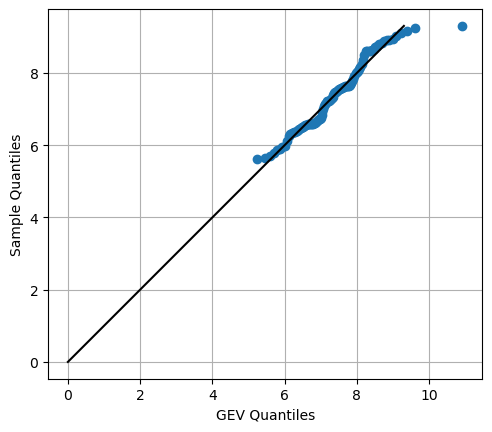

In [23]:
x_r1 = np.linspace(0, 1, 100)
x_r100 = np.linspace(0, precipitation.max(), 100)

fig, ax = plt.subplots()
ax.plot(
    gev.ppf(x_r1, shape, loc=loc, scale=scale),
    # quantiles of GEV distribution using the parameter estimates from our data
    np.quantile(precipitation, x_r1),
    "o",
)

# actual quantiles of our data
ax.plot(x_r100, x_r100, "k")


ax.set_xlabel("GEV Quantiles")
ax.set_ylabel("Sample Quantiles")

ax.grid(True)
ax.set_aspect("equal")

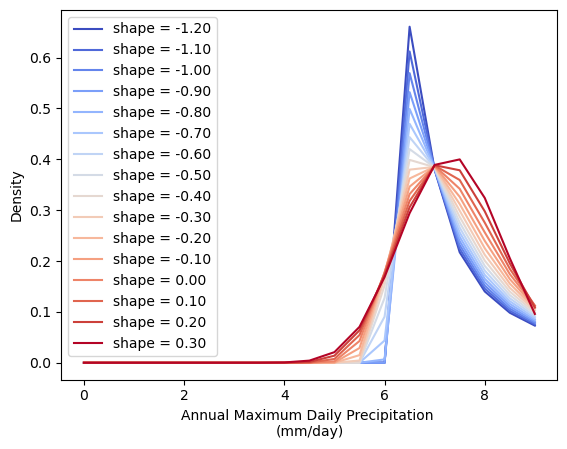

In [24]:
# set range of shape values to use
range_shape = np.arange(-1.2, 0.4, .1)

# set scale parameter
scale = scale

# set location parameter
loc =  loc

# create precipitation array
x_r80 = np.arange(precipitation.max(),step=0.5)

# setup plots
fig, ax = plt.subplots()

# setup colors to use for lines
colors_shape = plt.cm.coolwarm(np.linspace(0, 1, range_shape.size))

# generate pdf for each shape value
for idx, shapei in enumerate(range_shape):
    ax.plot(
        x_r80,
        gev.pdf(x_r80, shapei, loc=loc, scale=scale),
        color=colors_shape[idx],
        label="shape = %.2f" % shapei,
    )

# aesthetics
ax.legend()
ax.set_xlabel("Annual Maximum Daily Precipitation \n(mm/day)")
ax.set_ylabel("Density");

In [91]:
shape, loc, scale

(-0.7748344619542364, 835.6813858137025, 824.107648136393)

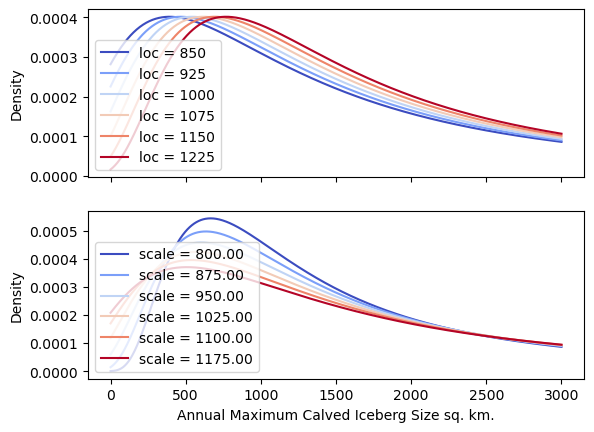

In [92]:
# set range of location & scale values to use
range_loc = np.arange(850, 1300, 75)
range_scale = np.arange(800, 1200, 75)

# set shape parameter
shape = -.6333
# set scale parameter for upper plot
scale = 1083.613265432893
# set location parameter for lower plot
loc = 1002.9987340113653

# set x values
x_r80 = np.linspace(0, precipitation.max()-7e3, 1000)

# setup plots
fig, axs = plt.subplots(2,1, sharex=True)

# setup colors to use for lines
colors_loc = plt.cm.coolwarm(np.linspace(0, 1, range_loc.size))
colors_scale = plt.cm.coolwarm(np.linspace(0, 1, range_scale.size))

# generate pdf for each location value
for idx, loci in enumerate(range_loc):
    axs[0].plot(
        x_r80,
        gev.pdf(x_r80, shape, loc=loci, scale=scale),
        color=colors_loc[idx],
        label="loc = %i" % loci,
    )
for idx, scalei in enumerate(range_scale):
    axs[1].plot(
        x_r80,
        gev.pdf(x_r80, shape, loc=loc, scale=scalei),
        color=colors_scale[idx],
        label="scale = %.2f" % scalei,
    )
# aesthetics
for i in range(len(axs)):
    axs[i].legend()
    axs[i].set_ylabel("Density")
axs[1].set_xlabel("Annual Maximum Calved Iceberg Size sq. km.")
axs[1].set_ylabel("Density");


  1 / 105: ksone
  2 / 105: kstwo
  3 / 105: kstwobign
  4 / 105: norm
  5 / 105: alpha
  6 / 105: anglit
  7 / 105: arcsine
  8 / 105: beta
  9 / 105: betaprime
 10 / 105: bradford
 11 / 105: burr
 12 / 105: burr12
 13 / 105: fisk
 14 / 105: cauchy
 15 / 105: chi
 16 / 105: chi2
 17 / 105: cosine
 18 / 105: dgamma
 19 / 105: dweibull
 20 / 105: expon
 21 / 105: exponnorm
 22 / 105: exponweib
 23 / 105: exponpow
 24 / 105: fatiguelife
 25 / 105: foldcauchy
 26 / 105: f
 27 / 105: foldnorm
 28 / 105: weibull_min
 29 / 105: truncweibull_min
 30 / 105: weibull_max
 31 / 105: genlogistic
 32 / 105: genpareto
 33 / 105: genexpon
 34 / 105: genextreme
 35 / 105: gamma
 36 / 105: erlang
 37 / 105: gengamma
 38 / 105: genhalflogistic
 39 / 105: genhyperbolic
 40 / 105: gompertz
 41 / 105: gumbel_r
 42 / 105: gumbel_l
 43 / 105: halfcauchy
 44 / 105: halflogistic
 45 / 105: halfnorm
 46 / 105: hypsecant
 47 / 105: gausshyper
 48 / 105: invgamma
 49 / 105: invgauss
 50 / 105: geninvgauss
 51 / 1

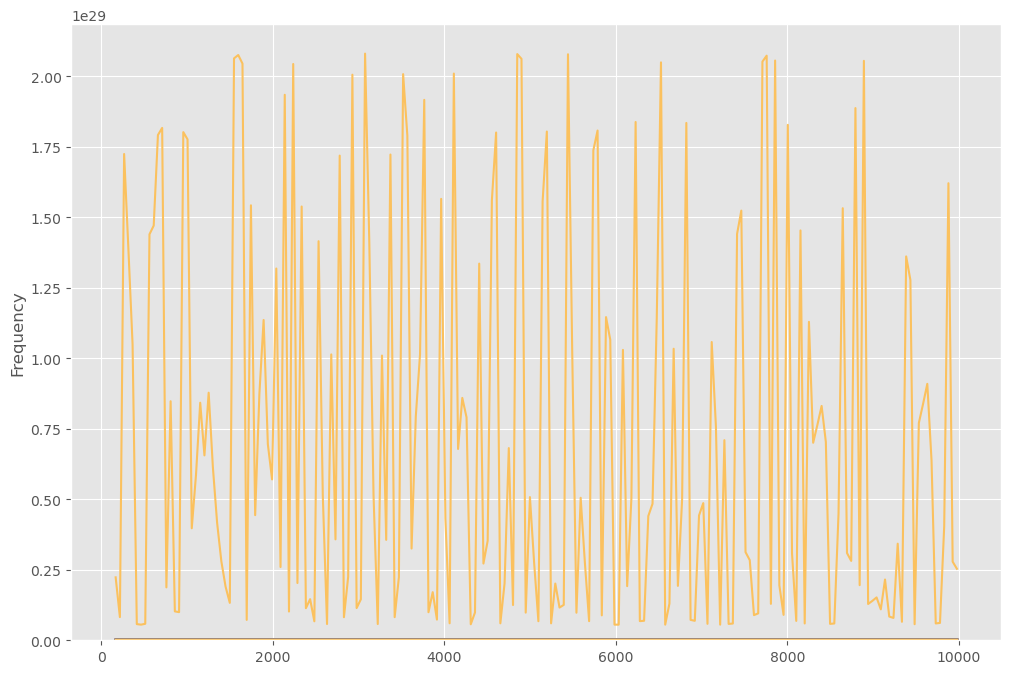

In [93]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = area #pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=20, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)


Text(0, 0.5, 'Frequency')

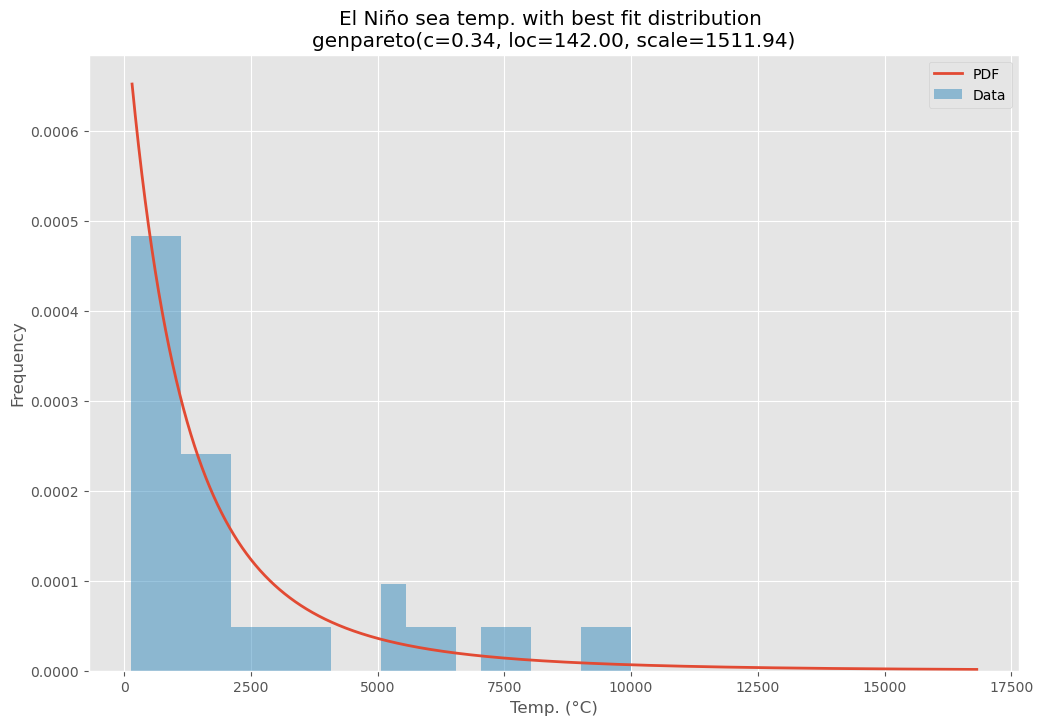

In [94]:
best_dist = best_distibutions[6]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=20, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [62]:
all = pd.read_csv('largest_annual_iceberg_NICBYU_manual_validation.csv')
QA =  pd.read_csv('largest_annual_iceberg_quadrentA.csv')

In [98]:
QA_Area.shape

(28,)

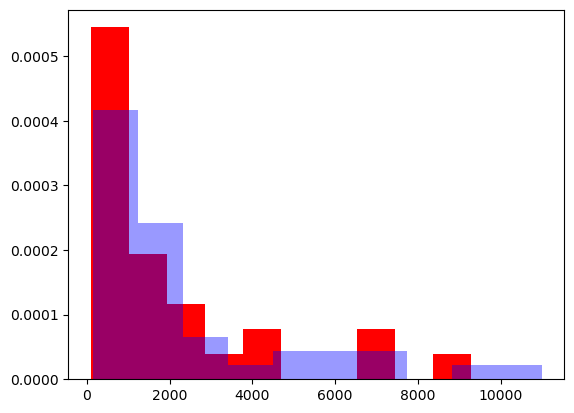

In [63]:
QA_Area = QA.Area
all_Area = all.Area

plt.hist(QA_Area, color='red',bins=10, density=True);
plt.hist(all_Area, color='blue',bins=10, alpha=.4, density= True);

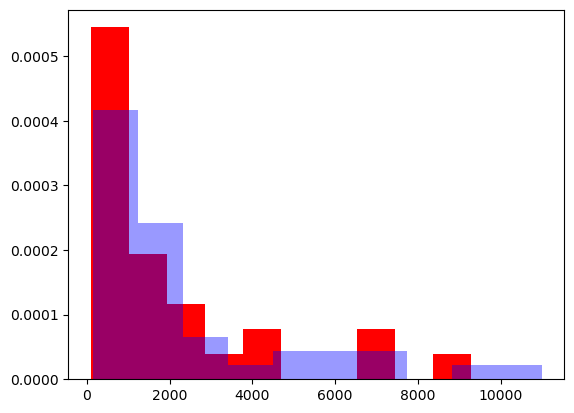

In [64]:
QA_Area = QA.Area
all_Area = all.Area

plt.hist(QA_Area, color='red',bins=10, density=True);
plt.hist(all_Area, color='blue',bins=10, alpha=.4, density= True);

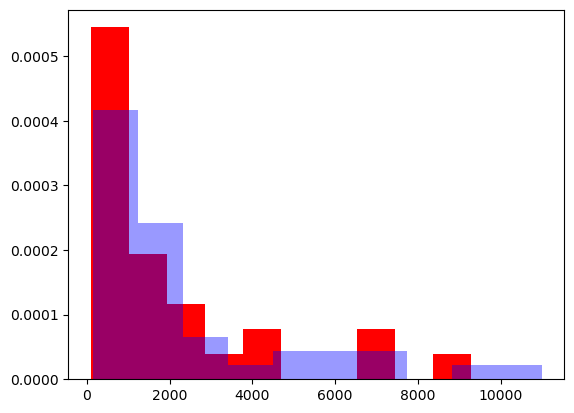

In [49]:
QA_Area = QA.Area
all_Area = all.Area

plt.hist(QA_Area, color='red',bins=10, density=True);
plt.hist(all_Area, color='blue',bins=10, alpha=.4, density= True);

In [47]:
QA_Area.at[9] = 287.96555

In [48]:
QA_Area

0     3858.642000
1     1028.971200
2     2057.942400
3     1800.699600
4     1972.194800
5     9274.460416
6      439.027712
7      754.578880
8      617.382720
9      287.965550
10    2953.147344
11    1584.615648
12    7134.200320
13     391.009056
14     178.355008
15      96.037312
16     754.578880
17    1920.746240
18    1337.662560
19     325.840880
20     360.139920
21     240.093280
22     603.663104
23     109.756928
24    7031.303200
25     651.681760
26    4273.660384
27    2400.932800
Name: Area, dtype: float64

In [45]:
QA

,File_Name,Date,Max_Size_1,Max_Size_2,Area,Year
0,a01.csv,1978-10-22,45,25,3858.642000,1978
1,a04.csv,1979-10-21,30,10,1028.971200,1979
2,a14.csv,1980-12-14,30,20,2057.942400,1980
3,a16.csv,1981-11-15,35,15,1800.699600,1981
4,a17.csv,1983-04-17,25,23,1972.194800,1983
5,a20.csv,1986-01-26,52,52,9274.460416,1986
6,a26.csv,1987-10-04,16,8,439.027712,1987
7,a28.csv,1989-09-24,22,10,754.578880,1989
8,a31.csv,1991-03-31,20,9,617.382720,1991
9,a33.csv,1994-06-12,30,15,1543.456800,1994
